<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
 4   Price                      5000 non-null   float64
 5   Address                    5000 non-null   object 
 6   Avg. Number of Bedrooms    5000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_6896\3935884237.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins=100)


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Avg. Number of Bedrooms'],
      dtype='object')

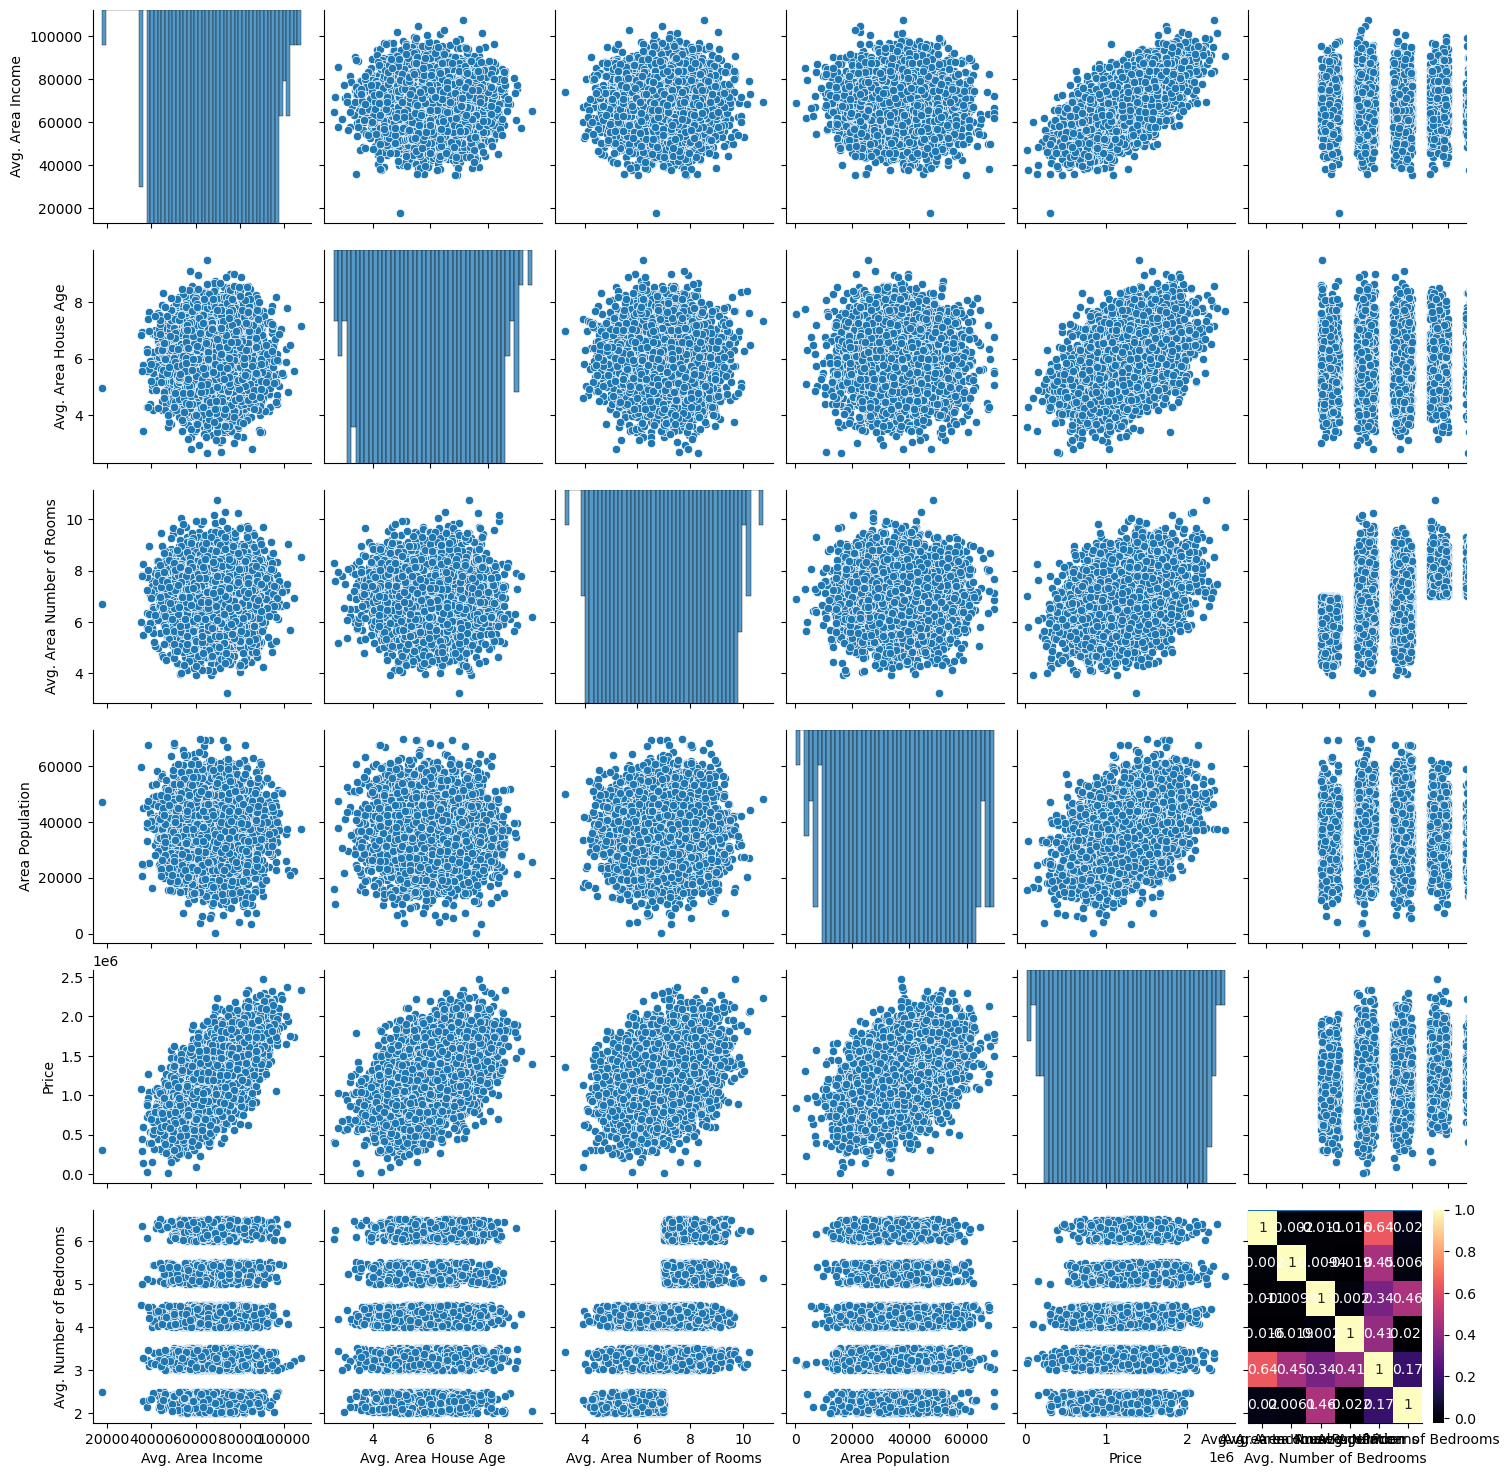

In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('USA_Housing.csv')
df.head()
df['Avg. Number of Bedrooms']=df['Avg. Area Number of Bedrooms']
df=df.drop('Avg. Area Number of Bedrooms',axis=1)
df.head()
df.info()
df.describe()
df.columns
df=df.drop('Address',axis=1)
df.corr()
sns.pairplot(df)
sns.distplot(df['Price'],bins=100)
df.corr()
sns.heatmap(df.corr(),annot=True, cmap='magma')
df.columns


In [3]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population', 'Avg. Number of Bedrooms']]
y=df['Price']



In [4]:
from sklearn.model_selection import train_test_split


In [5]:
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)
print(lm.intercept_)
lm.coef_
x_train.columns
pd.DataFrame(lm.coef_,x_test.columns, columns=['coff'])

-2650279.1425480824


,coff
Avg. Area Income,21.707320
Avg. Area House Age,167207.538815
Avg. Area Number of Rooms,119990.677635
Area Population,15.207845
Avg. Number of Bedrooms,1443.843615


CONTINUED THE MODEL

NOW WE WILL PREDICT THE RESULT FROM THE TEST X

In [6]:
predictions=lm.predict(x_test)

In [7]:
predictions

array([ 420123.05918018, 1414046.81382589,  903692.99662373, ...,
        970154.34250031,  923827.6054306 , 2130702.01317945])

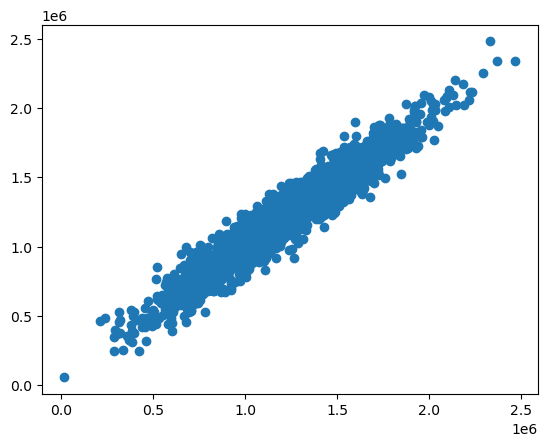

In [8]:
plt.scatter(y_test, predictions)

THE STRAUGHT LINE DISPLAYS THAT CHOICE OF ALGORITHM WAS RIGHT

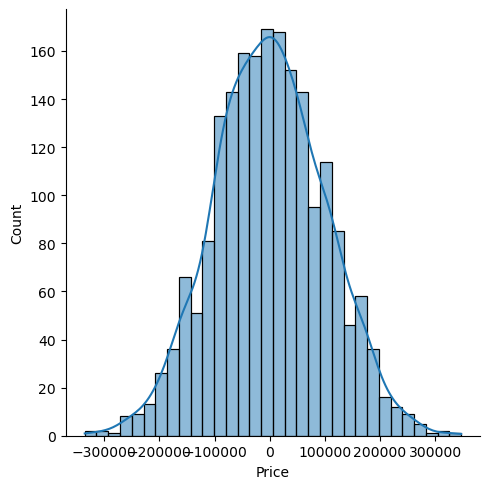

In [11]:
sns.displot((y_test-predictions), kde=True)

THE NORMAL DISTRIBUTION BETWEEN THE DIFFERENCE OF ACTUAL AND PREDICT VALUES SHOWS THAT MODEL WAS RIGHT FOR PREDICTIONS

ERRORS

In [12]:
from sklearn import metrics

MEAN ABSOLUTE ERROR

In [14]:
metrics.mean_absolute_error(y_true=y_test, y_pred=predictions)

80159.08750416955

MEAN SQUARED ERROR

In [15]:
metrics.mean_squared_error(y_true=y_test, y_pred=predictions)

10083343505.01961

ROOT MEAN SQUARED ERROR

In [16]:
np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=predictions))

100415.85285710424